# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading data

In [147]:
import os
data = pd.read_csv('/home/rajendra/data/Chennai_house_univariate_train.csv')
data.head()

,Size,Price
0,502.69,6.3
1,503.65,6.3
2,505.46,6.5
3,505.94,6.5
4,507.02,6.6


# Describing the data, i.e printing various info data like mean, sd etc

In [148]:
data.describe()

,Size,Price
count,97.000000,97.000000
mean,815.980000,19.908247
std,386.988353,17.767208
min,502.690000,6.300000
25%,570.770000,9.300000
50%,658.940000,12.700000
75%,857.810000,20.900000
max,2220.300000,86.400000


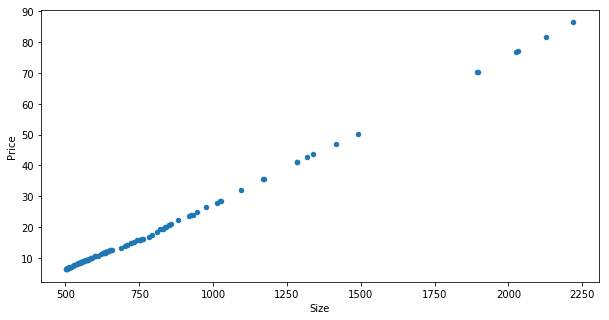

In [149]:
data.plot(kind = 'scatter', x = 'Size', y = 'Price', figsize=(10,5))

In [150]:
data.shape

(97, 2)

# Mean normalising data for easy computation

# \\(data = \frac{data - data.mean()}{data.max()-data.min()}\\)

In [151]:
data = (data -data.mean())/(data.max()-data.min())
data.head()

,Size,Price
0,-0.182399,-0.169891
1,-0.181840,-0.169891
2,-0.180786,-0.167394
3,-0.180507,-0.167394
4,-0.179878,-0.166145


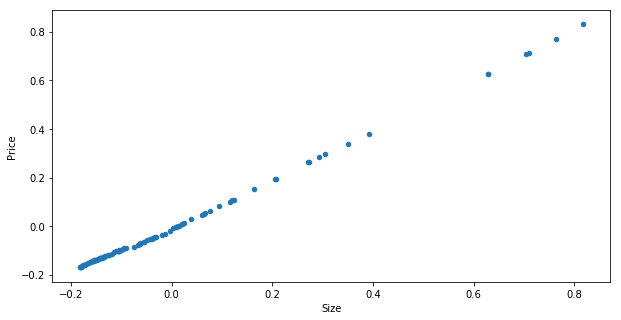

In [152]:
data.plot(kind = 'scatter', x = 'Size', y = 'Price', figsize=(10,5))

In [153]:
data.shape

(97, 2)

# Inserting dummy variable( column of 1's), for easy calculation loop

In [154]:
data.insert(0, 'ones', 1)
data.head()

,ones,Size,Price
0,1,-0.182399,-0.169891
1,1,-0.181840,-0.169891
2,1,-0.180786,-0.167394
3,1,-0.180507,-0.167394
4,1,-0.179878,-0.166145


In [155]:
cols = data.shape[1]

In [156]:
print(cols)

3


# Separating input and output(desired label) 

In [157]:
x = data.iloc[:,0:cols-1]

In [158]:
y = data.iloc[:,cols-1:cols]
x = np.matrix(x)

In [159]:
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))

In [160]:
x.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

# ComputeError Function defined

# \\(J(theta) = Error = \sum (x.theta^T - y)^2\\)

In [161]:
def computeError(x, y, theta):
    inner = np.power(((x*theta.T) - y), 2)
    return np.sum(inner)/(2*len(x))

In [162]:
computeError(x,y,theta)

0.024346853685025278

# Gradient Descent Function defined

# \\(   theta = theta - Learn Rate * \frac{dJ(theta)}{dtheta}   \\)

# \\(   theta_j = temp_j = theta_j - Learn Rate * (\frac {dJ}{d(theta)})_j   \\)

# \\(   (\frac {dJ}{d(theta)})_j = \frac{\sum (error*x_j)}{len(x)}  \\)

### Firstly calculate temp0, temp1, then theta = temp
then only call computeError Function

# Hyperparameters

In [ ]:
Learn_rate = 1
iters = 150

In [163]:
def gradientDescent(x, y, theta, Learn_rate, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (x * theta.T) - y
    
        for j in range (parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((Learn_rate/len(x))*np.sum(term))
            
        theta = temp
        cost[i] = computeError(x, y, theta)
        
    return theta, cost

# Gradient descent called!

In [164]:
%time
g, cost = gradientDescent(x, y, theta, Learn_rate, iters)
print(g, cost)

CPU times: user 7 µs, sys: 4 µs, total: 11 µs
Wall time: 22.4 µs
[[-9.65364673e-17  9.82955251e-01]] [2.19673183e-02 1.98208708e-02 1.78846789e-02 1.61381471e-02
 1.45626971e-02 1.31415706e-02 1.18596508e-02 1.07033016e-02
 9.66022291e-03 8.71931915e-03 7.87058178e-03 7.10498263e-03
 6.41437789e-03 5.79142147e-03 5.22948685e-03 4.72259664e-03
 4.26535895e-03 3.85291006e-03 3.48086268e-03 3.14525926e-03
 2.84252994e-03 2.56945453e-03 2.32312827e-03 2.10093094e-03
 1.90049899e-03 1.71970039e-03 1.55661194e-03 1.40949886e-03
 1.27679627e-03 1.15709258e-03 1.04911449e-03 9.51713408e-04
 8.63853270e-04 7.84599488e-04 7.13109024e-04 6.48621422e-04
 5.90450714e-04 5.37978129e-04 4.90645505e-04 4.47949357e-04
 4.09435518e-04 3.74694309e-04 3.43356182e-04 3.15087786e-04
 2.89588427e-04 2.66586861e-04 2.45838419e-04 2.27122393e-04
 2.10239700e-04 1.95010753e-04 1.81273561e-04 1.68881998e-04
 1.57704253e-04 1.47621426e-04 1.38526264e-04 1.30322020e-04
 1.22921424e-04 1.16245755e-04 1.10224003e-04

# minimum error reached, compute it and print

In [165]:
computeError(x, y, g)

5.477586076298723e-05

# Drawing Graph : Predicted price vs Size

In [166]:
#x = np.linspace(data.Size.min(), data.Size.max(), 100)

x=data.Size
f = g[0,0] + g[0,1]*x


Text(0.5,1,'Predicted Price vs Size')

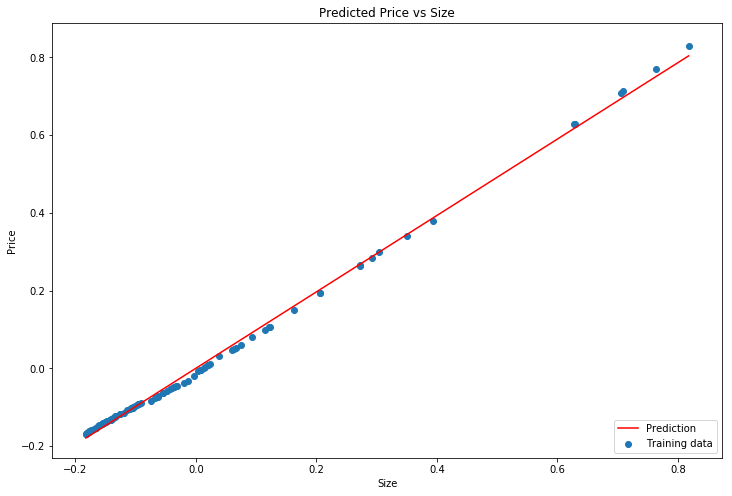

In [167]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label = 'Prediction')
ax.scatter(data.Size, data.Price, label = 'Training data')
ax.legend(loc=4)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted Price vs Size')

# Drawing Graph : Error vs iterations

Text(0.5,1,'Error vs Iterations')

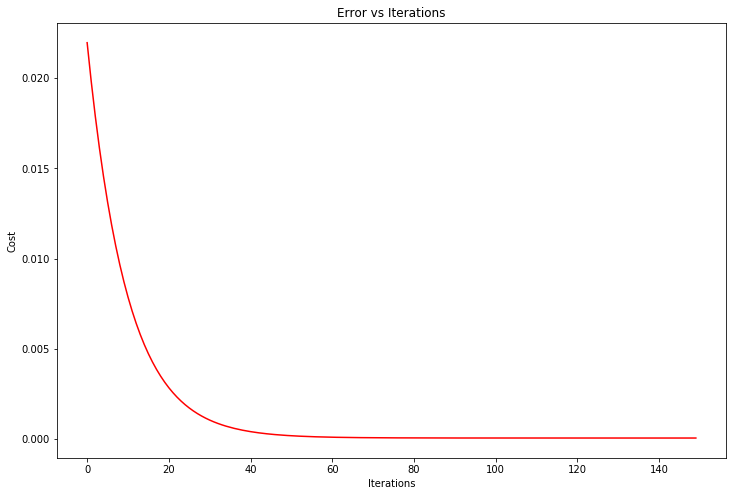

In [168]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Iterations')

# Calculating Accuracy using r2_score library

In [169]:
from  sklearn.metrics import r2_score
acc = (r2_score(y,f))
print("Accuracy = {}%" .format(acc*100))

Accuracy = 99.77501872943576%


# Predicting Price function

In [170]:
def predict(theta, acc):
    size = float(input("Enter the size of house: "))
    size = (size - data.Size.mean())/(data.Size.max()-data.Size.min())
    price = (theta[0,0] + (theta[0,1]*size))
    new_price = (price*(data.Price.max()-data.Price.min())) + data.Price.mean()
    
    price_at_max_acc = (new_price * (1/acc))
    price_range = price_at_max_acc - new_price
    
    return new_price, price_range

# Predicted Output :

In [171]:
new_price, price_range = predict(g, acc)
print("Your house cost is "+ str(new_price)+'Lakhs'+'(+or-)'+ str(price_range)+'Lakhs')

Enter the size of house: 67
Your house cost is 65.85800179163496Lakhs(+or-)0.1485022714962554Lakhs
